## Importing Libraries
- Pandas for Storing Data into Dataframes for analysis.
- Matplotlib or plotting Data.
- openpyxl for organizing csv data properly
- numpy for making dataseries values an array
- adjustText for clean labelling of values on charts
- 'kagglehub' to import dataset and 'os' to store data in relevant path

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
import os
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter
from openpyxl.styles import Font, PatternFill

c:\Users\Syed Edits\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download Data and Storing
Data Set is imported from kaggle and stored in relevant path then converted into a formatted excel sheet

In [3]:
# Step 1: Download dataset
path = kagglehub.dataset_download("hasibalmuzdadid/asia-cup-cricket-1984-to-2022")

# Step 2: Load CSVs into DataFrames (these will be importable too)
matches = pd.read_csv(f"{path}/asiacup.csv")
matches = matches[matches["Format"] == "T20I"]

champions = pd.read_csv(f"{path}/champion.csv")
champions = champions[champions["Year"].isin([2016, 2022])]

batsmanDataT20 = pd.read_csv(f"{path}/batsman data t20i.csv")
bowlerDataT20 = pd.read_csv(f"{path}/bowler data t20i.csv")
wkpDataT20 = pd.read_csv(f"{path}/wicketkeeper data t20i.csv")

# Step 3: Ensure Data folder exists
os.makedirs("Data", exist_ok=True)
excel_path = "Data/asia_cup_t20_analysis.xlsx"


def format_excel(path: str):
    """Apply header style, column auto-width, freeze header."""
    wb = load_workbook(path)
    for sheet in wb.sheetnames:
        ws = wb[sheet]

        # Bold headers + fill color
        for cell in ws[1]:
            cell.font = Font(bold=True, color="FFFFFF")
            cell.fill = PatternFill(start_color="4F81BD", end_color="4F81BD", fill_type="solid")

        # Auto column width
        for col in ws.columns:
            max_len = 0
            col_letter = get_column_letter(col[0].column)
            for cell in col:
                try:
                    max_len = max(max_len, len(str(cell.value)))
                except:
                    pass
            ws.column_dimensions[col_letter].width = max_len + 2

        # Freeze header row
        ws.freeze_panes = "A2"

    wb.save(path)


if __name__ == "__main__":
    # Step 4: Write to Excel
    with pd.ExcelWriter(excel_path, engine="openpyxl") as writer:
        matches.to_excel(writer, sheet_name="Matches", index=False)
        champions.to_excel(writer, sheet_name="Champions", index=False)
        batsmanDataT20.to_excel(writer, sheet_name="Batsman", index=False)
        bowlerDataT20.to_excel(writer, sheet_name="Bowler", index=False)
        wkpDataT20.to_excel(writer, sheet_name="Wicketkeeper", index=False)

    # Step 5: Apply formatting
    format_excel(excel_path)

    print("✅ Excel file created with formatting!")
    print(matches.head())

✅ Excel file created with formatting!
           Team    Opponent Format  Ground  Year  Toss Selection  Run Scored  \
180  Bangladesh       India   T20I  Mirpur  2016   Win   Bowling       121.0   
181       India  Bangladesh   T20I  Mirpur  2016  Lose   Batting       166.0   
182   Sri Lanka         UAE   T20I  Mirpur  2016  Lose   Batting       129.0   
183         UAE   Sri Lanka   T20I  Mirpur  2016   Win   Bowling       115.0   
184  Bangladesh         UAE   T20I  Mirpur  2016  Lose   Batting       133.0   

     Wicket Lost  Fours  Sixes  Extras  Run Rate  Avg Bat Strike Rate  \
180          7.0    8.0    3.0    10.0      6.05                72.89   
181          6.0   15.0    5.0     7.0      8.30               146.48   
182          8.0   14.0    1.0     5.0      6.45                87.84   
183          9.0    7.0    2.0    16.0      5.75                65.10   
184          8.0    8.0    5.0     5.0      6.65                64.80   

     Highest Score  Wicket Taken  Given Ex

## Charts
Coded Functions for making pie chart, bar chart, stacked bar chart, scatterplot etc.

In [6]:
def makePieChart(data, labels=None, colors_map=None, colors=None, title="Pie Chart", save_path=None, 
                 number_type="count", figsize=(7,7), text_color="white"):
    """
    General Pie Chart maker with arrows pointing to labels.
    
    Parameters:
    -----------
    data : list/Series/array
        Values for each category.
    labels : list/Series (optional)
        Category names (default = indices if Series).
    colors_map : dict (optional)
        Mapping of category -> color.
    title : str
        Title of the chart.
    save_path : str (optional)
        File path to save chart (e.g., "output.png").
    number_type : str ("count" | "percent" | "both")
        What to display inside wedges.
    figsize : tuple
        Figure size.
    text_color : str
        Color of text inside wedges.
    """
    # If pandas Series passed, extract
    if hasattr(data, "values"):
        values = data.values
        if labels is None:
            labels = data.index
    else:
        values = np.array(data)
        if labels is None:
            labels = [f"Label {i}" for i in range(len(values))]

    # Assign colors
    if colors_map:
        colors = [colors_map.get(lbl, "#808080") for lbl in labels]
        if colors is None and colors_map:
            colors = [colors_map.get(lbl, "#808080") for lbl in labels]
    else:
        colors=None

    # Define number format
    def format_autopct(pct):
        total = sum(values)
        count = int(round(pct*total/100))
        if number_type == "count":
            return str(count)
        elif number_type == "percent":
            return f"{pct:.1f}%"
        elif number_type == "both":
            return f"{count}\n({pct:.1f}%)"
        return ""

    # Plot
    plt.figure(figsize=figsize)
    wedges, texts, autotexts = plt.pie(
        values,
        autopct=format_autopct,
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor':'white', 'linewidth':2},
        pctdistance=0.6,
        textprops={'fontsize':12, 'color':text_color}
    )

    # White text with black border
    for autotext in autotexts:
        autotext.set_color(text_color)

    # Arrows for labels
    label_radius = 1.2
    arrow_radius = 0.9
    for i, wedge in enumerate(wedges):
        angle = (wedge.theta2 + wedge.theta1)/2.0
        x_arrow = np.cos(np.deg2rad(angle)) * arrow_radius
        y_arrow = np.sin(np.deg2rad(angle)) * arrow_radius
        x_text = np.cos(np.deg2rad(angle)) * label_radius
        y_text = np.sin(np.deg2rad(angle)) * label_radius
        plt.annotate(
            labels[i],
            xy=(x_arrow, y_arrow),
            xytext=(x_text, y_text),
            ha="center", va="center",
            arrowprops=dict(arrowstyle="-", color="black", linewidth=1.2),
            fontsize=12
        )

    plt.title(title, fontsize=16, pad=25)

    # Save or show
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
    else:
        plt.show()

def makeBarChart(data, title, xlabel, ylabel, colors_map, save_path=None, line_style='-', figsize=(10, 6), orientation='vertical'):
    """
    Function to plot a bar chart with customizable parameters, supporting both vertical and horizontal bar charts.

    Parameters:
    - data: A pandas DataFrame or Series with x and y values.
    - title: Title of the chart.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - colors_map: Dictionary mapping categories to colors.
    - save_path: Path to save the figure (optional).
    - line_style: Style of the line (default is solid line '-').
    - figsize: Tuple for the figure size (default is (10, 6)).
    - orientation: 'vertical' or 'horizontal' to control bar chart orientation.
    """
    plt.figure(figsize=figsize)

    if orientation == 'vertical':
        # Plot vertical bars
        bars = plt.bar(data.index, data, color=[colors_map.get(team, '#808080') for team in data.index])
        
        # Add values above each bar
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, 
                     f'{height:.2f}', ha='center', va='bottom', fontsize=9)
        
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)

    elif orientation == 'horizontal':
        # Plot horizontal bars
        bars = plt.barh(data.index, data, color=[colors_map.get(team, '#808080') for team in data.index])

        # Add values beside each bar
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2, 
                     f'{width:.2f}', va='center', fontsize=9)
        
        plt.ylabel(xlabel, fontsize=14)
        plt.xlabel(ylabel, fontsize=14)

    plt.title(title, fontsize=16, pad=20)

    # Adjust layout to avoid clipping
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)
    else:
        plt.show()

def makeStackedBarChart(data, title, xlabel, ylabel, colors_map, save_path=None, figsize=(10, 6)):
    """
    Function to plot a stacked bar chart with customizable parameters.

    Parameters:
    - data: A pandas DataFrame with categories as columns and teams as index.
    - title: Title of the chart.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - colors_map: Dictionary mapping categories to colors.
    - save_path: Path to save the figure (optional).
    - figsize: Tuple for the figure size (default is (10, 6)).
    """
    # Create a stacked bar chart
    ax = data.plot(kind='bar', stacked=True, figsize=figsize, color=[colors_map.get(col, '#808080') for col in data.columns])

    # Set chart title and labels
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Add color legend
    plt.legend(title="Boundary Type", loc="upper left", bbox_to_anchor=(1.05, 1))

    # Add grid for better readability
    plt.grid(True, which='minor', linestyle='--', linewidth=0.5)

    # Adjust layout to prevent clipping
    plt.tight_layout()

    # Save or display the plot
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)
    else:
        plt.show()

def makeLineChart(data, title, xlabel, ylabel, colors_map, save_path=None, line_style='-', figsize=(10, 6)):
    """
    Function to plot a line chart with customizable parameters.

    Parameters:
    - data: A pandas DataFrame or Series with x and y values.
    - title: Title of the chart.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - colors_map: Dictionary mapping categories to colors.
    - save_path: Path to save the figure (optional).
    - line_style: Style of the line (default is solid line '-').
    - figsize: Tuple for the figure size (default is (10, 6)).
    """
    plt.figure(figsize=figsize)

    # Ensure data is a Series if it's a DataFrame
    if isinstance(data, pd.DataFrame):
        data = data.squeeze()  # Convert DataFrame to Series

    # Plot each team's line
    for team, color in colors_map.items():
        if team in data.index:  # Check if team exists in the index of the data
            plt.plot(data.index, data[team], label=team, color=color, linestyle=line_style, linewidth=2)

    # Set chart title and labels
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Adjust legend position (add more space on the right)
    plt.legend(
        title="Teams", 
        loc="upper left", 
        bbox_to_anchor=(0.8, 1),  # Add more space to the right of the plot
        borderaxespad=0.2,         # Adds some padding between the legend and the plot
        handlelength=1.5, 
        handleheight=1.5
    )

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Save or display the plot
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)
    else:
        plt.show()

def makeScatterPlot(
    data, 
    x_col, 
    y_col, 
    label_col=None, 
    color_col=None, 
    colors_map=None,
    title="Scatterplot", 
    xlabel=None, 
    ylabel=None, 
    figsize=(10,6), 
    point_size=80,
    annotate_top_n=0,
    save_path=None
):
    """
    General Scatter Plot maker.

    Parameters:
    -----------
    data : DataFrame
        Pandas DataFrame with data.
    x_col : str
        Column for X-axis.
    y_col : str
        Column for Y-axis.
    label_col : str (optional)
        Column to use for annotating points (e.g., player names).
    color_col : str (optional)
        Column to determine point colors (e.g., country).
    colors_map : dict (optional)
        Mapping of category -> color.
    title : str
        Title of the chart.
    xlabel, ylabel : str
        Custom axis labels (default = column names).
    figsize : tuple
        Size of figure.
    point_size : int
        Size of scatter points.
    annotate_top_n : int
        If > 0, annotate top N by y_col.
    """

    plt.figure(figsize=figsize)

    # Assign colors
    if color_col and colors_map:
        colors = data[color_col].map(lambda c: colors_map.get(c, "#808080"))
    else:
        colors = "blue"


    # Annotations (rank by combined score = x_col * y_col)
    if label_col:

        ann = data.copy()
        ann["_x"] = pd.to_numeric(ann[x_col], errors="coerce")
        ann["_y"] = pd.to_numeric(ann[y_col], errors="coerce")
        ann["_score"] = ann["_x"] * ann["_y"]
        ann = ann.dropna(subset=["_x", "_y", "_score"])

        # choose which rows to annotate
        if annotate_top_n and annotate_top_n > 0:
            ann = ann.nlargest(annotate_top_n, "_score")
        plt.scatter(ann[x_col], ann[y_col], alpha=0.7)

        texts = []
        for _, row in ann.iterrows():
            texts.append(
                plt.text(row["_x"], row["_y"], str(row[label_col]), fontsize=9)
            )

        adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))

    # Labels & title
    plt.xlabel(xlabel if xlabel else x_col)
    plt.ylabel(ylabel if ylabel else y_col)
    plt.title(title)
    plt.grid(True)
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)
    else:
        plt.show()

## Teams Analysis
Analysed following parameters of each team:-
1. Total Wins
2. Toss Win %age
3. Average Team Runrate
4. Average Team Economy Rate
5. Total Boundaries (Fours + Sixes) by each team
6. Total Wickets by each team

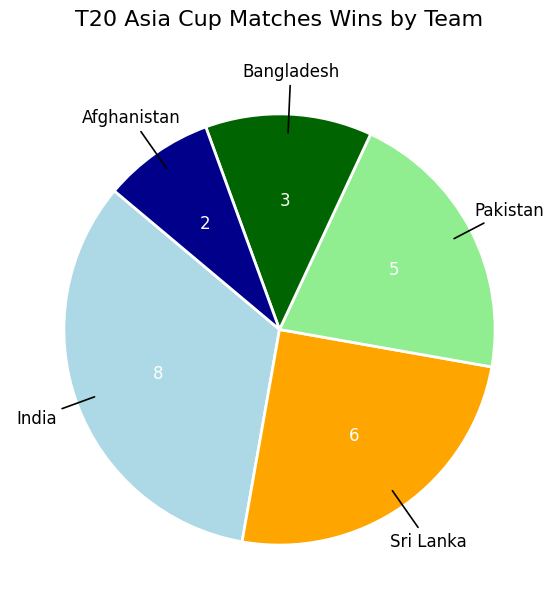

In [7]:
colors_map={'Pakistan':'#90ee90','Bangladesh':'#006400','Sri Lanka':'#ffa500','India':'#add8e6','Hong Kong':"#FC1D1D",'UAE':"#8B0068",'Afghanistan':'#00008B'}
winCounts = matches[matches['Result']=="Win"]
winCounts = winCounts['Team'].value_counts()
makePieChart(
    data=winCounts, 
    colors_map=colors_map,
    title="T20 Asia Cup Matches Wins by Team",
    save_path="Analysis/asia_cup_wins.png",
    number_type="count"
)

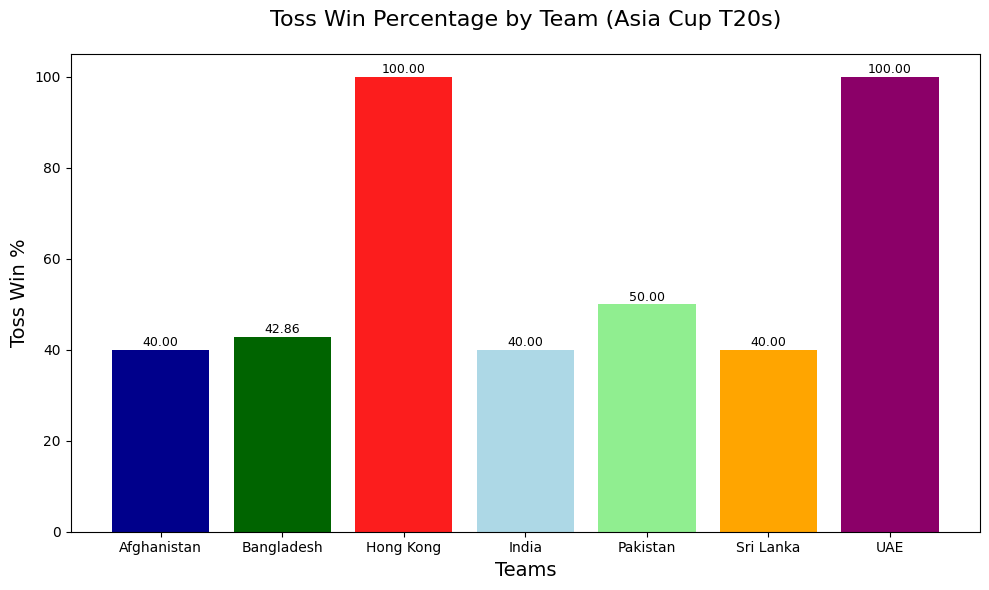

In [8]:
totalMatches = matches['Team'].value_counts()
tossWins = matches[matches['Toss']=='Win']['Team'].value_counts()
tossWinPercent = (tossWins/totalMatches)*100
makeBarChart(
    data=tossWinPercent,
    colors_map=colors_map,
    title="Toss Win Percentage by Team (Asia Cup T20s)",
    xlabel="Teams",
    ylabel="Toss Win %",
    save_path="Analysis/toss_win_percentage.png",
    orientation = 'vertical'
)

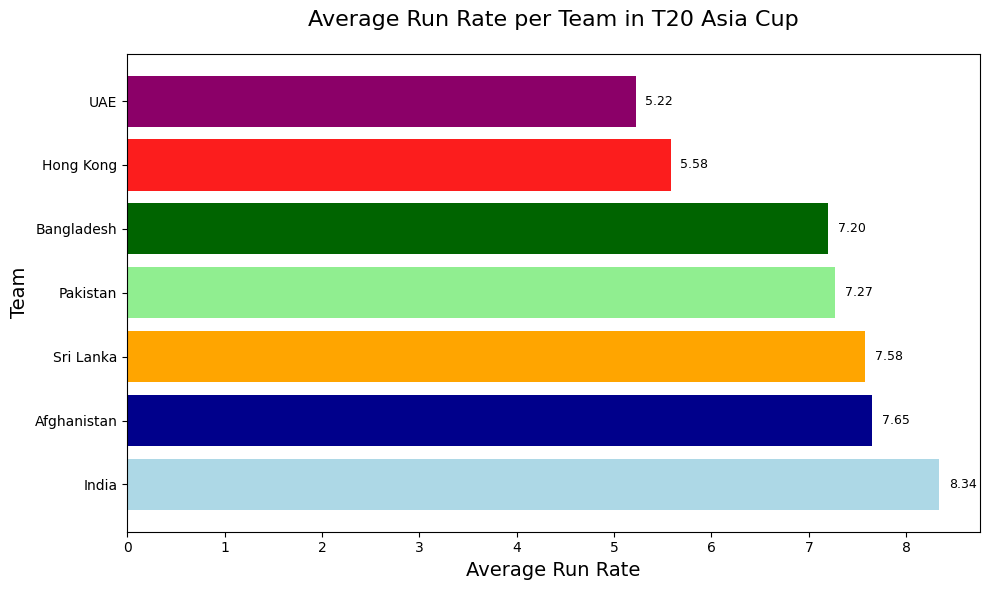

In [9]:
avgTeamRR = matches.groupby('Team')['Run Rate'].mean().sort_values(ascending=False)
makeBarChart(
    data=avgTeamRR,
    colors_map=colors_map,
    title="Average Run Rate per Team in T20 Asia Cup",
    xlabel="Team",
    ylabel="Average Run Rate",
    save_path="Analysis/avg_run_rate_per_team.png",
    orientation = 'horizontal'
)

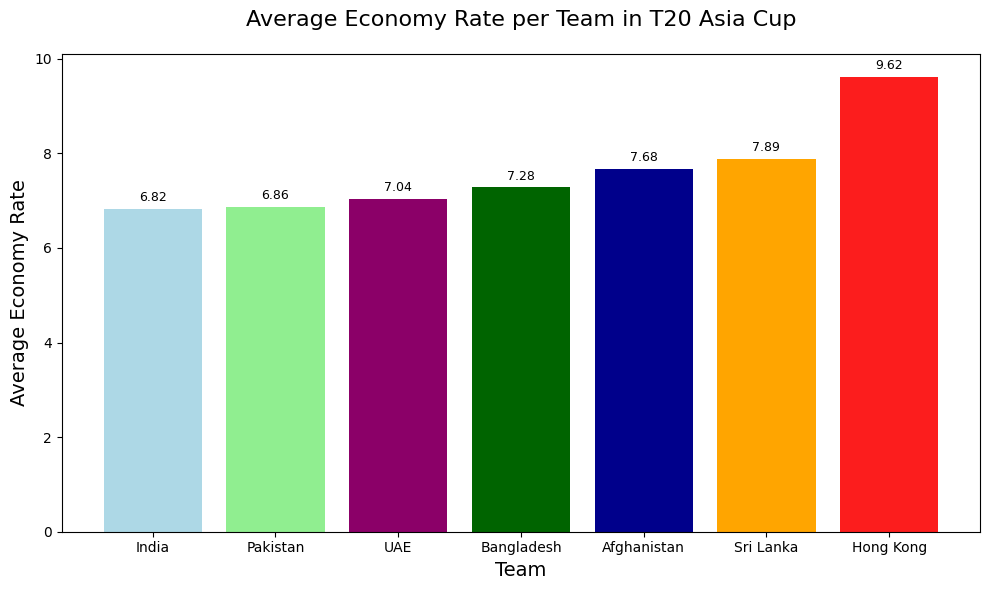

In [10]:
matches['Overs Faced by Opponent'] = matches['Run Scored'] / matches['Run Rate']
matches['Economy Rate'] = matches['Run Scored'] / matches['Overs Faced by Opponent']
avg_team_eco = matches.groupby('Opponent')['Economy Rate'].mean().sort_values(ascending=True)
makeBarChart(
    data=avg_team_eco,
    colors_map=colors_map,
    title="Average Economy Rate per Team in T20 Asia Cup",
    xlabel="Team",
    ylabel="Average Economy Rate",
    save_path="Analysis/avg_econ_rate.png",
    orientation = 'vertical'
)

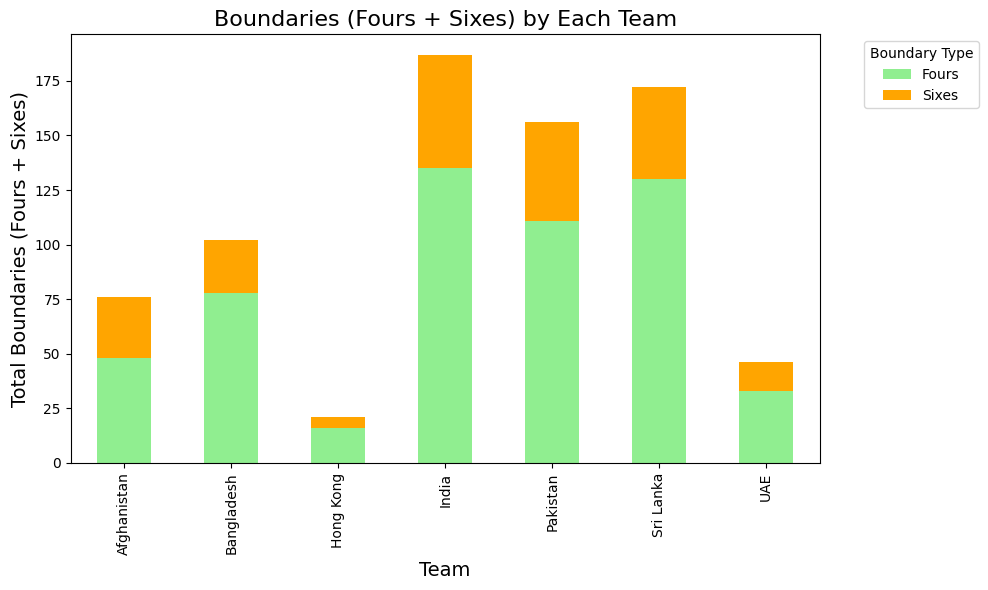

In [11]:
boundaries = matches.groupby('Team')[['Fours', 'Sixes']].sum()
colors_map2 = {'Fours': '#90ee90', 'Sixes': '#ffa500', 'Extras': '#add8e6'}

# Call the function to create a stacked bar chart for boundaries and extras
makeStackedBarChart(
    data=boundaries,  # The summed data for each team
    title="Boundaries (Fours + Sixes) by Each Team",
    xlabel="Team",
    ylabel="Total Boundaries (Fours + Sixes)",
    colors_map=colors_map2,  # Color mapping for each category
    save_path="Analysis/boundaries.png"  # Optional path to save the image
)

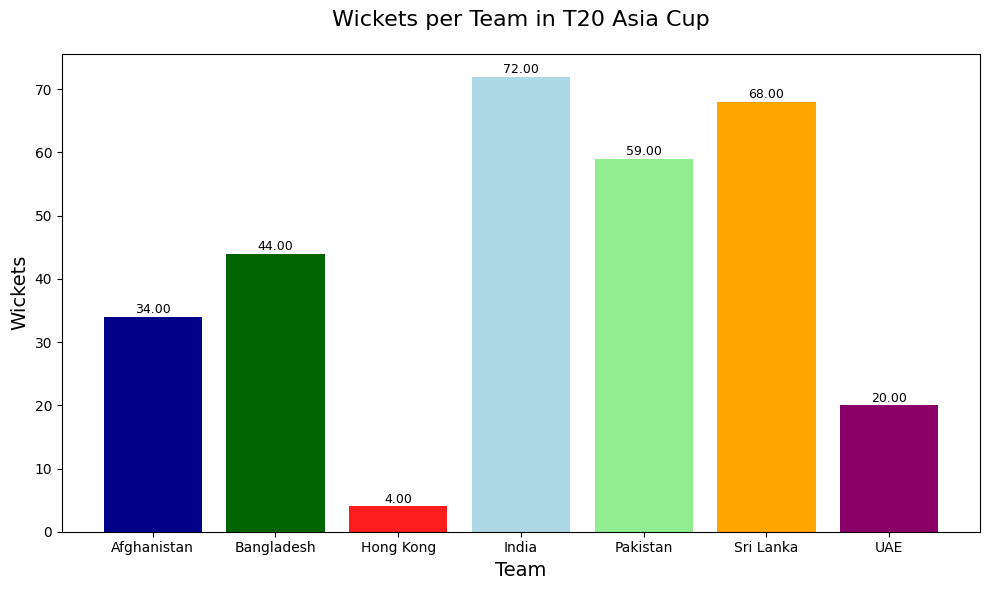

In [ ]:
avgWickets = matches.groupby('Team')['Wicket Taken'].sum().astype(int)
makeBarChart(
    data=avgWickets,
    colors_map=colors_map,
    title="Wickets per Team in T20 Asia Cup",
    xlabel="Team",
    ylabel="Wickets",   
    save_path="Analysis/wickets_per_team.png",
    orientation = 'vertical'
)

## Batsman Analysis
Performance of Batsman are analyzed by following parameters:-
1. Most Runs
2. Most Fifties
3. Best Average
4. Balance b/w Strike Rate and Average

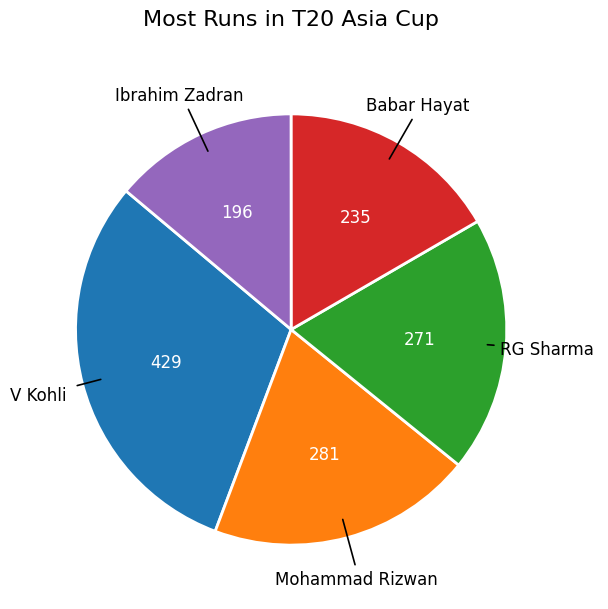

In [13]:
mostRuns = batsmanDataT20[['Player Name', 'Runs', 'Country']].sort_values(by='Runs', ascending=False).head(5)
colors = [colors_map.get(country, "#808080") for country in mostRuns['Country']]
makePieChart(
    data=mostRuns['Runs'],
    labels=mostRuns['Player Name'],
    colors=colors,
    title="Most Runs in T20 Asia Cup",
    save_path="Analysis/most_runs.png",
    number_type="count"
)

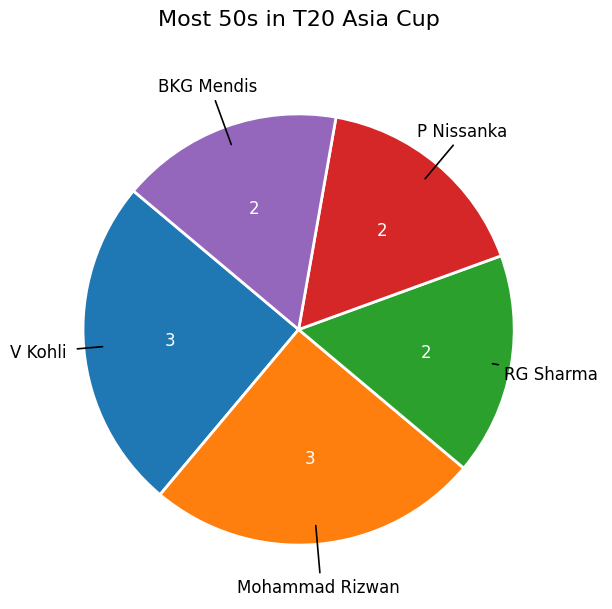

In [14]:
most50s = batsmanDataT20[['Player Name', 'Fifties', 'Country']].sort_values(by='Fifties', ascending=False).head(5).reset_index(drop=True)
colors = [colors_map.get(country, "#808080") for country in most50s['Country']]
makePieChart(
    data=most50s['Fifties'],
    labels=most50s['Player Name'],
    colors=colors,
    title="Most 50s in T20 Asia Cup",
    save_path="Analysis/most_50s.png",
    number_type="count"
)

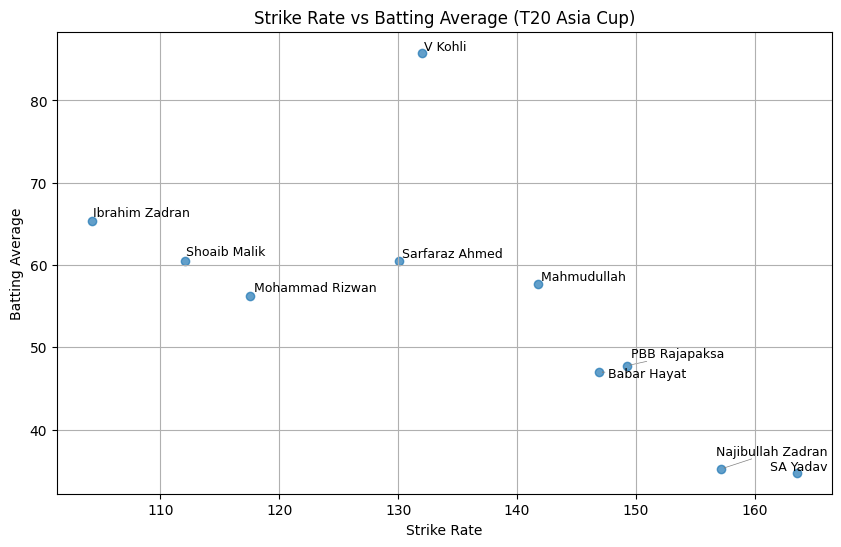

In [16]:
mostAvg = batsmanDataT20[['Player Name', 'Batting Average', 'Country']].sort_values(by='Batting Average', ascending=False).head(5).reset_index(drop=True)
mostSR = batsmanDataT20[['Player Name', 'Strike Rate', 'Country']].sort_values(by='Strike Rate', ascending=False).head(5).reset_index(drop=True)

batsmanDataT20["Batting Average"] = pd.to_numeric(
    batsmanDataT20["Batting Average"], errors="coerce"
)
batsmanDataT20["Strike Rate"] = pd.to_numeric(
    batsmanDataT20["Strike Rate"], errors="coerce"
)
batsmanDataT20["Runs"] = pd.to_numeric(
    batsmanDataT20["Runs"], errors="coerce"
)

# Apply filter Runs > 100
filtered_data = batsmanDataT20[batsmanDataT20["Runs"] > 100]
makeScatterPlot(
    data=filtered_data,
    x_col="Strike Rate",
    y_col="Batting Average",
    label_col="Player Name",
    color_col="Country",
    colors_map=colors_map,
    title="Strike Rate vs Batting Average (T20 Asia Cup)",
    annotate_top_n=10,   # annotate top 10 by Average
    save_path="Analysis/most_Avg_Sr.png",
)

## Bowlers Analysis
Performance of Bowlers are analysed by following parameters:-
1. Most Wickets.
2. Best Bowling Average.
3. Comparison of Economy Rate with wickets

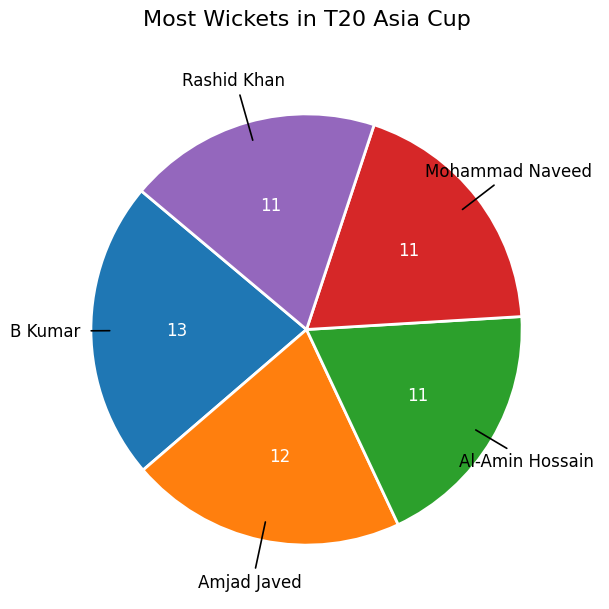

In [17]:

# Top 5 wickets
mostWickets = bowlerDataT20[['Player Name', 'Wickets', 'Country']].sort_values(by='Wickets', ascending=False).head(5)
colors = [colors_map.get(country, "#808080") for country in mostWickets['Country']]
makePieChart(
    data=mostWickets['Wickets'],
    labels=mostWickets['Player Name'],   
    colors=colors,
    title="Most Wickets in T20 Asia Cup",
    save_path="Analysis/most_wickets.png",
    number_type="count"
)

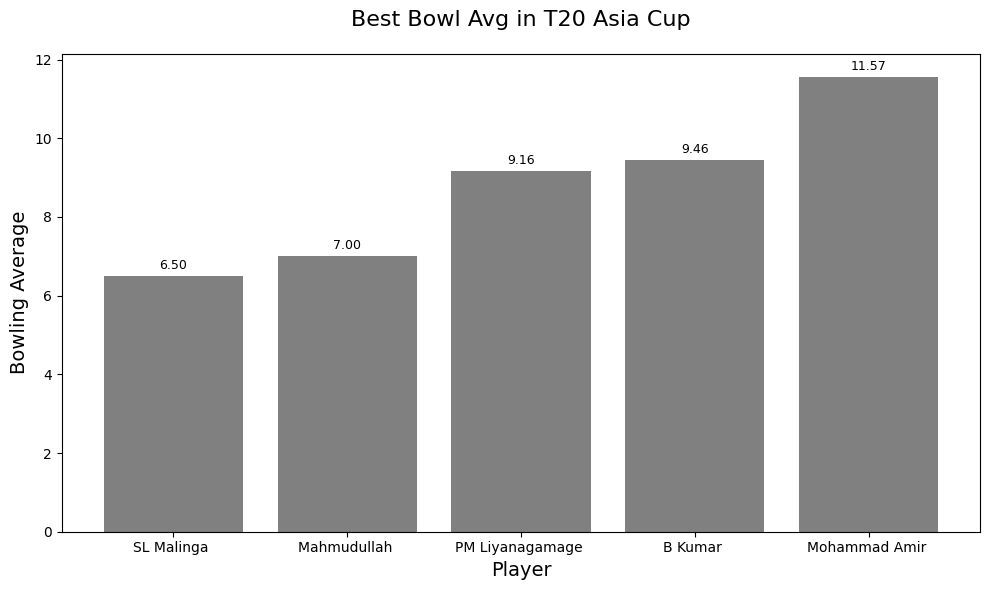

In [18]:
# Best Avg
mostWickets = bowlerDataT20[['Player Name', 'Bowling Average', 'Country']].sort_values(by='Bowling Average', ascending=True).head(5)
colors = [colors_map.get(country, "#808080") for country in mostWickets['Country']]
makeBarChart(
    data = mostWickets.set_index('Player Name')['Bowling Average'],
    colors_map = colors_map,
    title = "Best Bowl Avg in T20 Asia Cup",
    xlabel = "Player",
    ylabel = "Bowling Average",  
    save_path="Analysis/best_Avg.png",
)

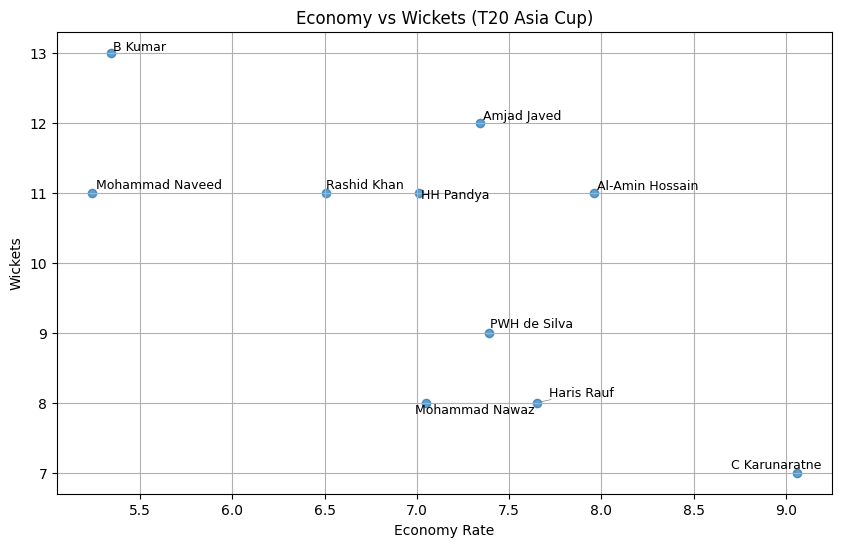

In [19]:
# Economy vs wickets
bowlerDataT20["Economy Rate"] = pd.to_numeric(bowlerDataT20["Economy Rate"], errors="coerce")
bowlerDataT20["Wickets"] = pd.to_numeric(bowlerDataT20["Wickets"], errors="coerce")
bowlerDataT20["Overs"] = pd.to_numeric(bowlerDataT20["Overs"], errors="coerce")

# Apply filter overs > 12
filtered_data = bowlerDataT20[bowlerDataT20["Overs"] > 12]  
makeScatterPlot(
    data=filtered_data,
    x_col="Economy Rate",
    y_col="Wickets",
    label_col="Player Name",
    color_col="Country",
    colors_map=colors_map,
    title="Economy vs Wickets (T20 Asia Cup)",
    annotate_top_n=10,
    save_path="Analysis/most_eco_wkt.png",
)
